In [1]:
import pandas as pd
import matplotlib.pyplot as plt



In [3]:
df = pd.read_csv(r"C:\Users\Rajan\Downloads\time_series_covid19_confirmed_global.csv")

print(df.head())
print(df.info())


  Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  2/28/23  3/1/23  3/2/23  3/3/23  \
0        0        0        0        0  ...   209322  209340  209358  209362   
1        0        0        0        0  ...   334391  334408  334408  334427   
2        0        0        0        0  ...   271441  271448  271463  271469   
3        0        0        0        0  ...    47866   47875   47875   47875   
4        0        0        0        0  ...   105255  105277  105277  105277   

   3/4/23  3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
0  209369  209390  209406  2

In [6]:
df_country = df.drop(columns=["Lat", "Long", "Province/State"])
df_country = df_country.groupby("Country/Region").sum()

print(df_country.head())


                1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  \
Country/Region                                                                  
Afghanistan           0        0        0        0        0        0        0   
Albania               0        0        0        0        0        0        0   
Algeria               0        0        0        0        0        0        0   
Andorra               0        0        0        0        0        0        0   
Angola                0        0        0        0        0        0        0   

                1/29/20  1/30/20  1/31/20  ...  2/28/23  3/1/23  3/2/23  \
Country/Region                             ...                            
Afghanistan           0        0        0  ...   209322  209340  209358   
Albania               0        0        0  ...   334391  334408  334408   
Algeria               0        0        0  ...   271441  271448  271463   
Andorra               0        0        0  ...    47866  

In [9]:
df_country.columns = pd.to_datetime(
    df_country.columns,
    format="%m/%d/%y"
)



In [11]:
countries = ["India", "US", "Brazil"]
data = df_country.loc[countries]


In [12]:
daily_cases = data.diff(axis=1)
daily_cases = daily_cases.fillna(0)


In [13]:
weekly_cases = daily_cases.rolling(window=7, axis=1).sum()


C:\Users\Rajan\AppData\Local\Temp\ipykernel_18412\2983556320.py:1: FutureWarning: Support for axis=1 in DataFrame.rolling is deprecated and will be removed in a future version. Use obj.T.rolling(...) instead
  weekly_cases = daily_cases.rolling(window=7, axis=1).sum()


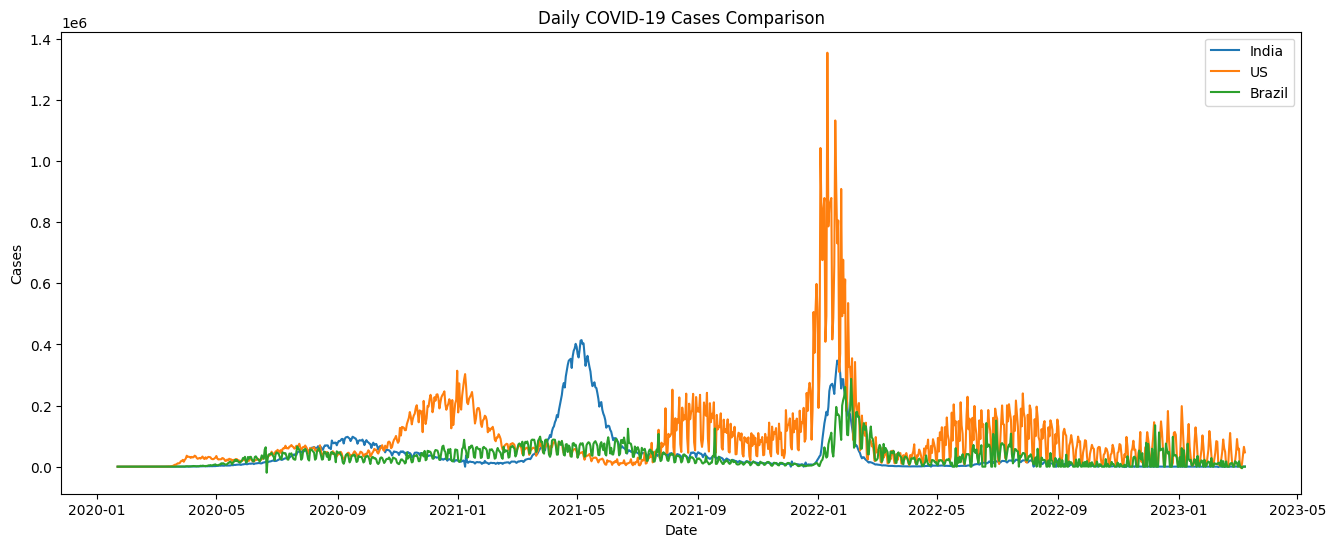

In [18]:
plt.figure(figsize=(16, 6))  

for country in countries:
    plt.plot(daily_cases.columns, daily_cases.loc[country], label=country)

plt.legend()
plt.title("Daily COVID-19 Cases Comparison")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.show()


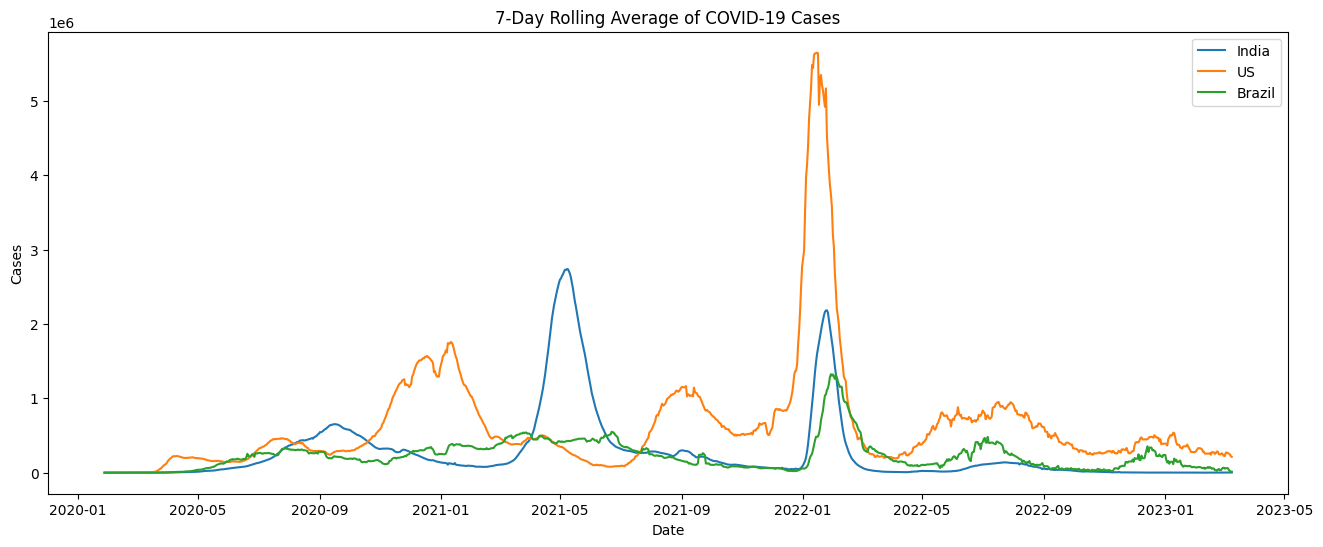

In [19]:
plt.figure(figsize=(16, 6))  

for country in countries:
    plt.plot(weekly_cases.columns, weekly_cases.loc[country], label=country)

plt.legend()
plt.title("7-Day Rolling Average of COVID-19 Cases")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.show()


In [16]:
peak_cases = daily_cases.max(axis=1)

print("Peak Daily Cases:")
print(peak_cases)


Peak Daily Cases:
Country/Region
India      414188.0
US        1354505.0
Brazil     287149.0
dtype: float64


In [17]:
plt.savefig("covid_plot.png")


<Figure size 640x480 with 0 Axes>